In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

# import images
img1 = cv.imread('test/testA_11.bmp')
img2 = cv.imread('test/testA_12.bmp')
img3 = cv.imread('test/testA_13.bmp')
img4 = cv.imread('test/testA_14.bmp')
img5 = cv.imread('test/testA_15.bmp')
# import images
img1_anno = cv.imread('test/testA_11_anno.bmp')[:,:,0]
img2_anno = cv.imread('test/testA_12_anno.bmp')[:,:,0]
img3_anno = cv.imread('test/testA_13_anno.bmp')[:,:,0]
img4_anno = cv.imread('test/testA_14_anno.bmp')[:,:,0]
img5_anno = cv.imread('test/testA_15_anno.bmp')[:,:,0]

In [2]:
img1_anno[img1_anno>1]=1
img2_anno[img2_anno>1]=1
img3_anno[img3_anno>1]=1
img4_anno[img4_anno>1]=1
img5_anno[img5_anno>1]=1

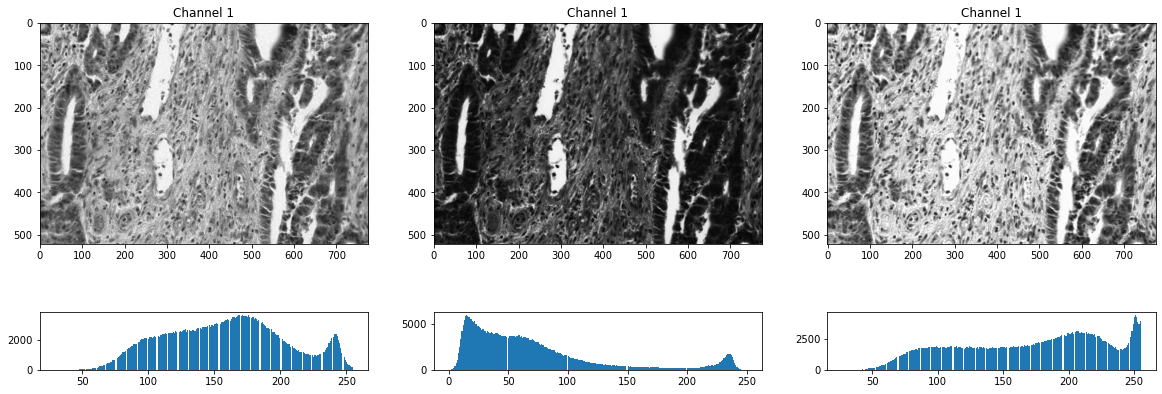

In [3]:
img = img3

fig, ax = plt.subplots(2,3,figsize=(20,7),gridspec_kw={'height_ratios': [5, 1]})
ax[0,0].imshow(img[:,:,0],cmap='gray')
ax[0,0].set_title('Channel 1')
ax[0,1].imshow(img[:,:,1],cmap='gray')
ax[0,1].set_title('Channel 1')
ax[0,2].imshow(img[:,:,2],cmap='gray')
ax[0,2].set_title('Channel 1')

ax[1,0].hist(img[:,:,0].flatten(),bins=255)
ax[1,1].hist(img[:,:,1].flatten(),bins=255)
ax[1,2].hist(img[:,:,2].flatten(),bins=255)

plt.show()

# Part 1

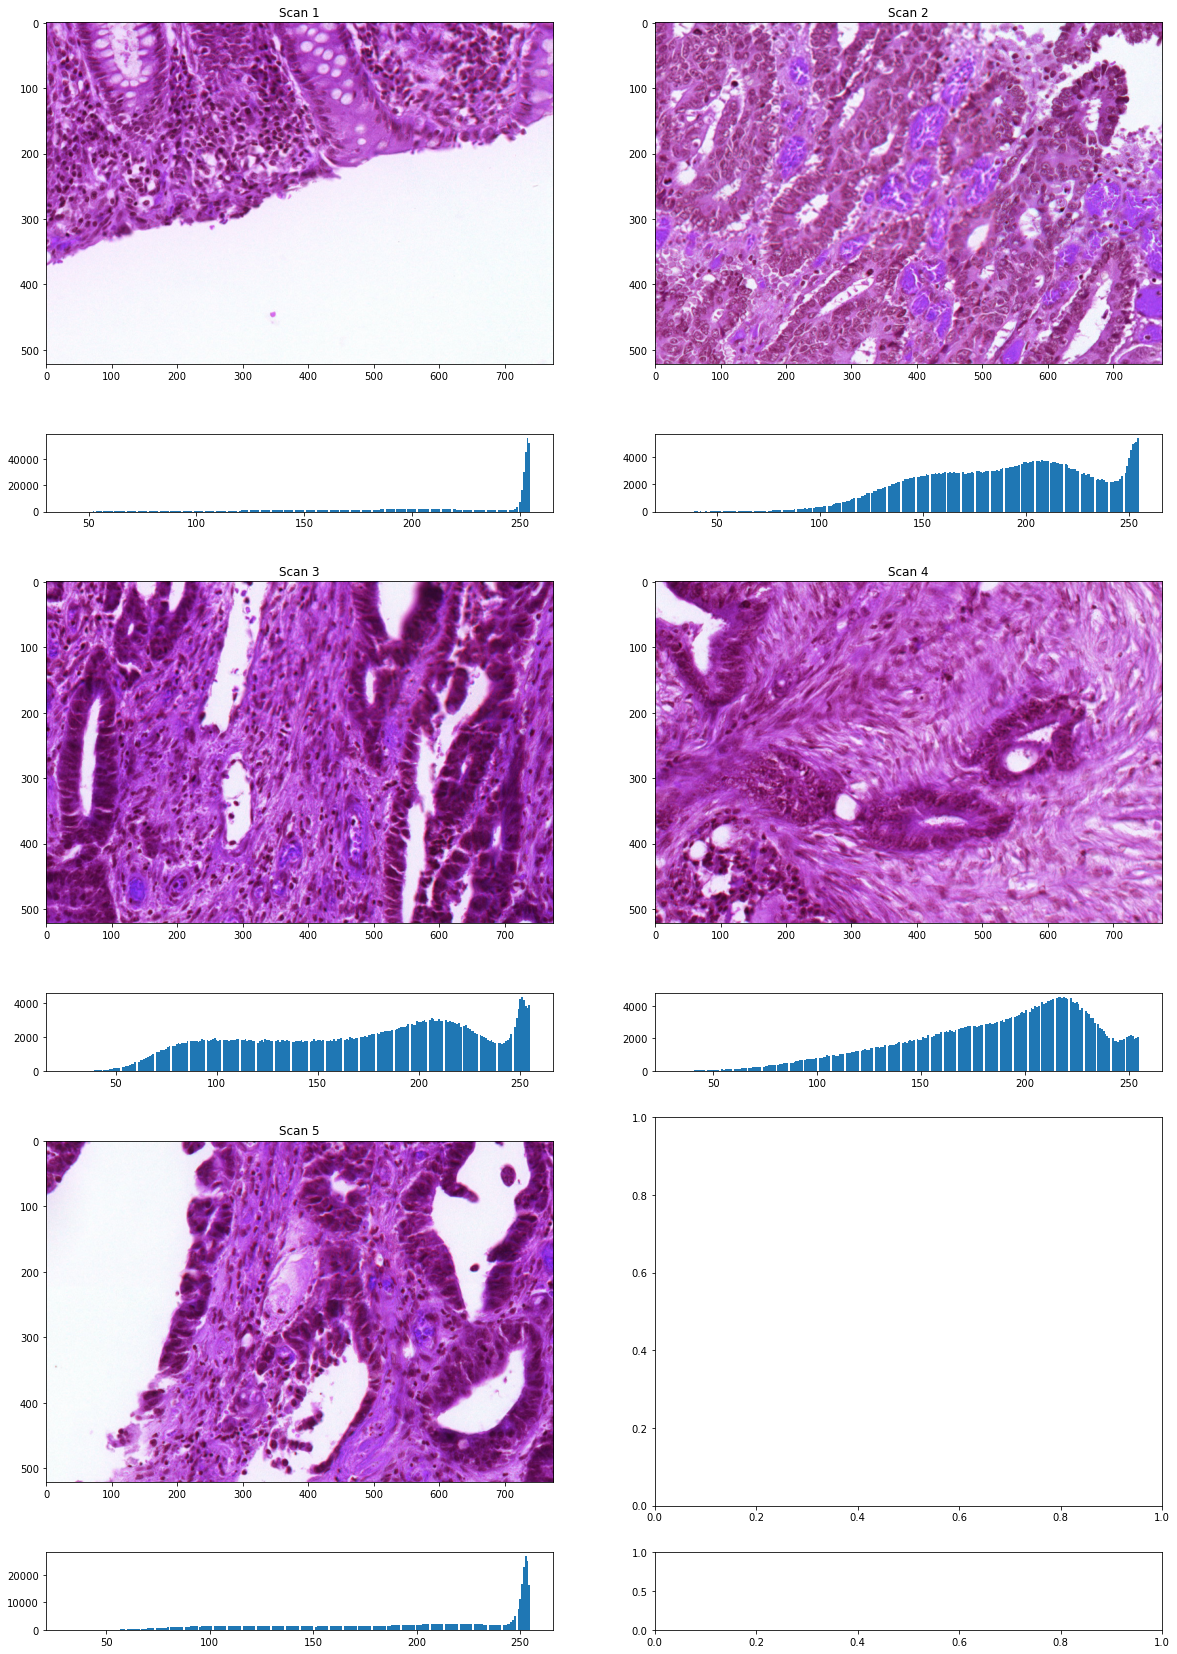

In [4]:
fig, ax = plt.subplots(6,2,figsize=(20,30),gridspec_kw={'height_ratios': [5, 1,5,1,5,1]})

# Images
ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title('Scan 1')
ax[0,1].imshow(img2,cmap='gray')
ax[0,1].set_title('Scan 2')
ax[2,0].imshow(img3,cmap='gray')
ax[2,0].set_title('Scan 3')
ax[2,1].imshow(img4,cmap='gray')
ax[2,1].set_title('Scan 4')
ax[4,0].imshow(img5,cmap='gray')
ax[4,0].set_title('Scan 5')

# Histograms of the 3rd channel of the images
ax[1,0].hist(img1[:,:,2].flatten(),bins=255)
ax[1,1].hist(img2[:,:,2].flatten(),bins=255)
ax[3,0].hist(img3[:,:,2].flatten(),bins=255)
ax[3,1].hist(img4[:,:,2].flatten(),bins=255)
ax[5,0].hist(img5[:,:,2].flatten(),bins=255)

plt.show()

In [5]:
def f_b_seg(img,t1,t2):
    img_map = []
    for x in img.flatten():
        if  t1<= x <=t2:
            img_map.append(1)
        else:
            img_map.append(0)
    img_map = np.asarray(img_map).reshape(img.shape)

    return img_map

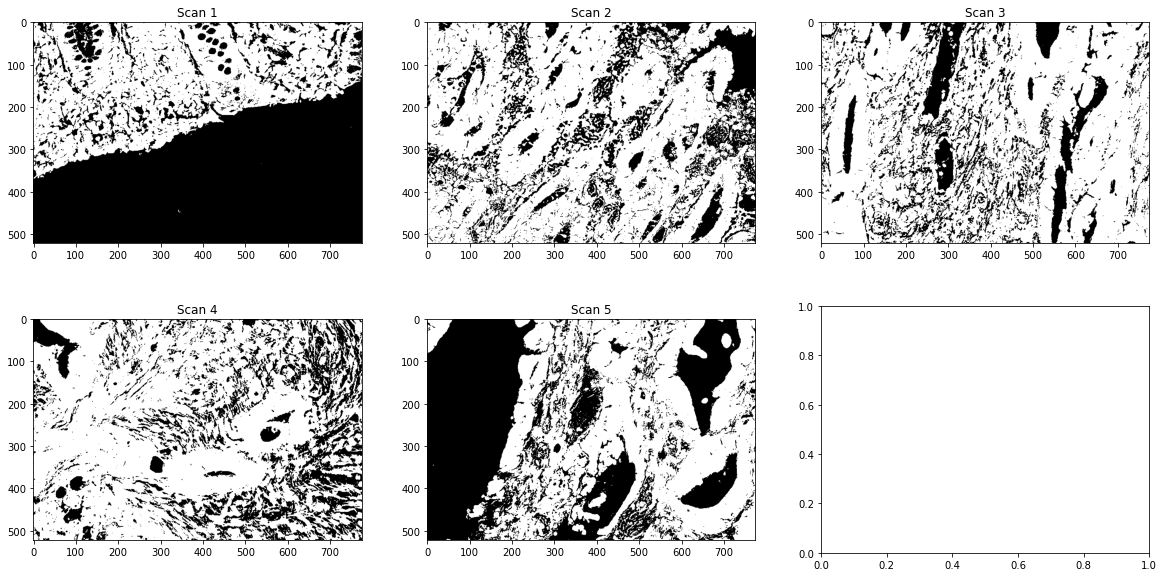

In [6]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

ax[0,0].imshow(f_b_seg(img1[:,:,2],51,220),cmap='gray')
ax[0,0].set_title('Scan 1')
ax[0,1].imshow(f_b_seg(img2[:,:,2],51,220),cmap='gray')
ax[0,1].set_title('Scan 2')
ax[0,2].imshow(f_b_seg(img3[:,:,2],50,220),cmap='gray')
ax[0,2].set_title('Scan 3')
ax[1,0].imshow(f_b_seg(img4[:,:,2],50,220),cmap='gray')
ax[1,0].set_title('Scan 4')
ax[1,1].imshow(f_b_seg(img5[:,:,2],50,220),cmap='gray')
ax[1,1].set_title('Scan 5')
plt.show()

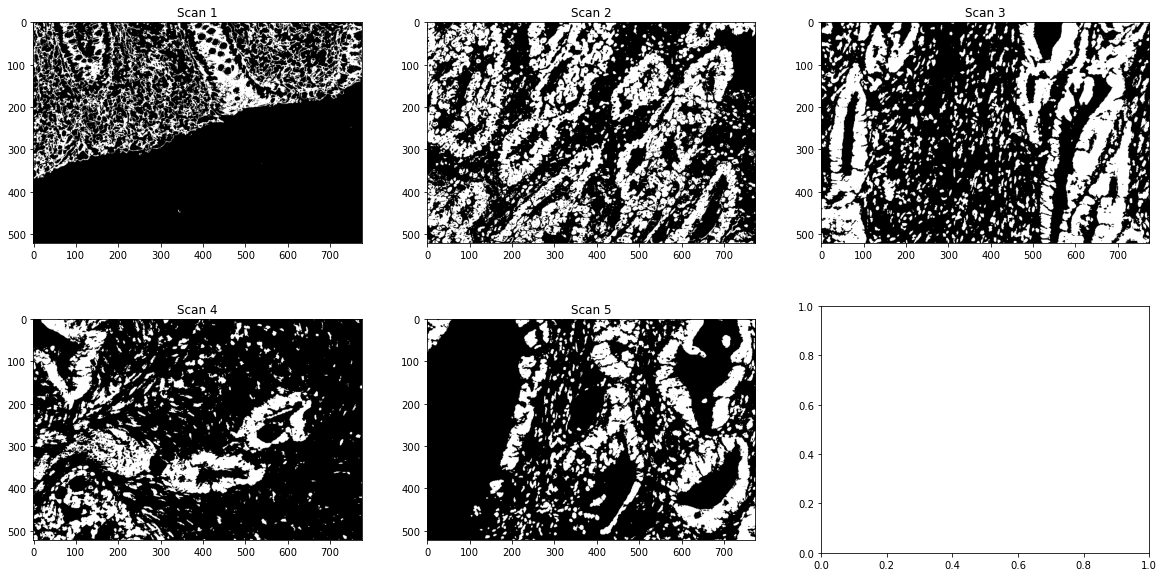

In [7]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

ax[0,0].imshow(f_b_seg(img1[:,:,2],180,220),cmap='gray')
ax[0,0].set_title('Scan 1')
ax[0,1].imshow(f_b_seg(img2[:,:,2],50,180),cmap='gray')
ax[0,1].set_title('Scan 2')
ax[0,2].imshow(f_b_seg(img3[:,:,2],10,150),cmap='gray')
ax[0,2].set_title('Scan 3')
ax[1,0].imshow(f_b_seg(img4[:,:,2],10,150),cmap='gray')
ax[1,0].set_title('Scan 4')
ax[1,1].imshow(f_b_seg(img5[:,:,2],10,150),cmap='gray')
ax[1,1].set_title('Scan 5')
plt.show()

# Part 2

In [8]:
from maxflow import fastmin as mp

def alpha_seg(img,t1=10,t2=150):
    labels = f_b_seg(img[:,:,2],t1,t2)

    D = np.zeros(labels.shape+(2,),dtype=float)
    D[:,:,0] = labels**2 # beta label
    D[:,:,1] = (labels-1)**2 # alpha label

    V = np.array([[0,1],[1,0]],dtype=float)
    optimized_label_exp = mp.aexpansion_grid(D,3*V,labels=labels.copy())
    optimized_label_swap = mp.abswap_grid(D,3*V,labels=labels.copy())

    fig, ax = plt.subplots(2,2,figsize=(20,10))

    ax[0,0].imshow(labels,cmap='gray')
    ax[0,0].set_title('Original Segmentaion')
    ax[0,1].imshow(optimized_label_exp,cmap='gray')
    ax[0,1].set_title('Alpha Expansion')
    ax[1,1].imshow(optimized_label_swap,cmap='gray')
    ax[1,1].set_title('Alpha Beta Swap')
    ax[1,0].imshow(img[:,:,2],cmap='gray')
    ax[1,0].set_title('Original Image')
    plt.show()

    return optimized_label_swap,optimized_label_exp

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\maxflow\fastmin.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  binary += V[labels[slice0],labels[slice1]].sum()


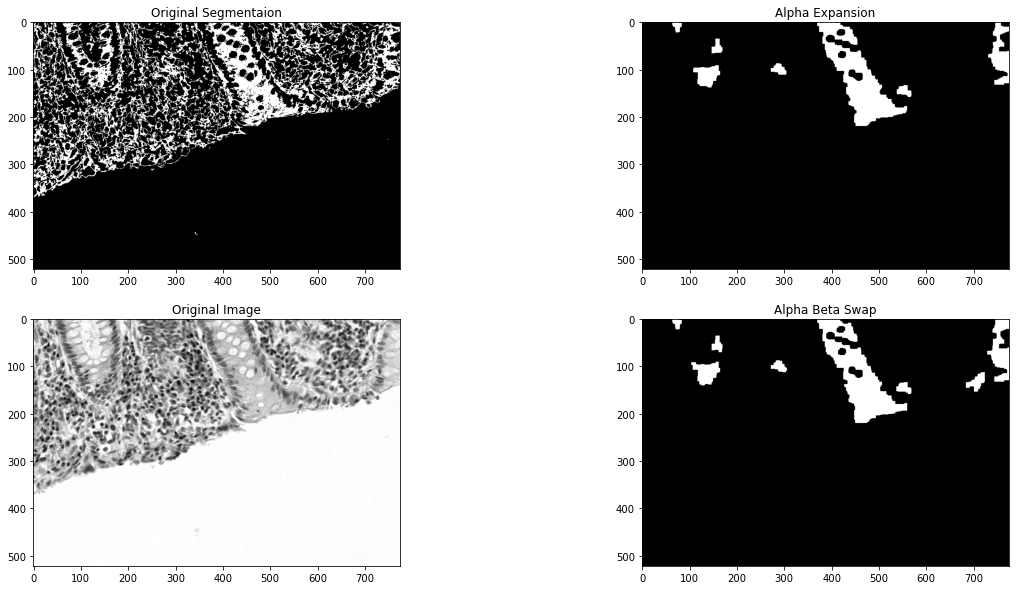

In [9]:
swap1,exp1 = alpha_seg(img1,180,220)

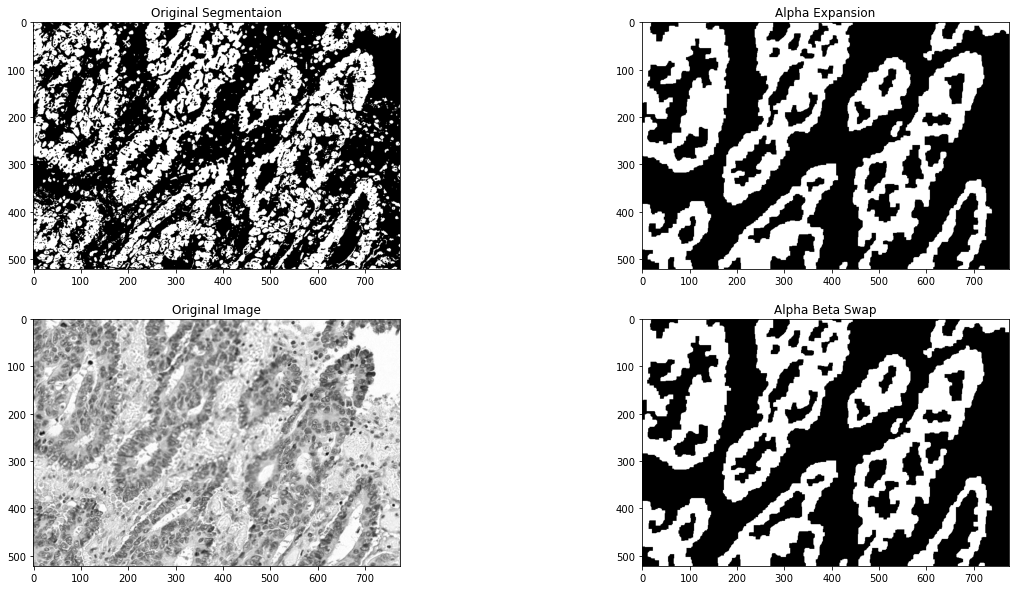

In [10]:
swap2,exp2 = alpha_seg(img2,50,180)

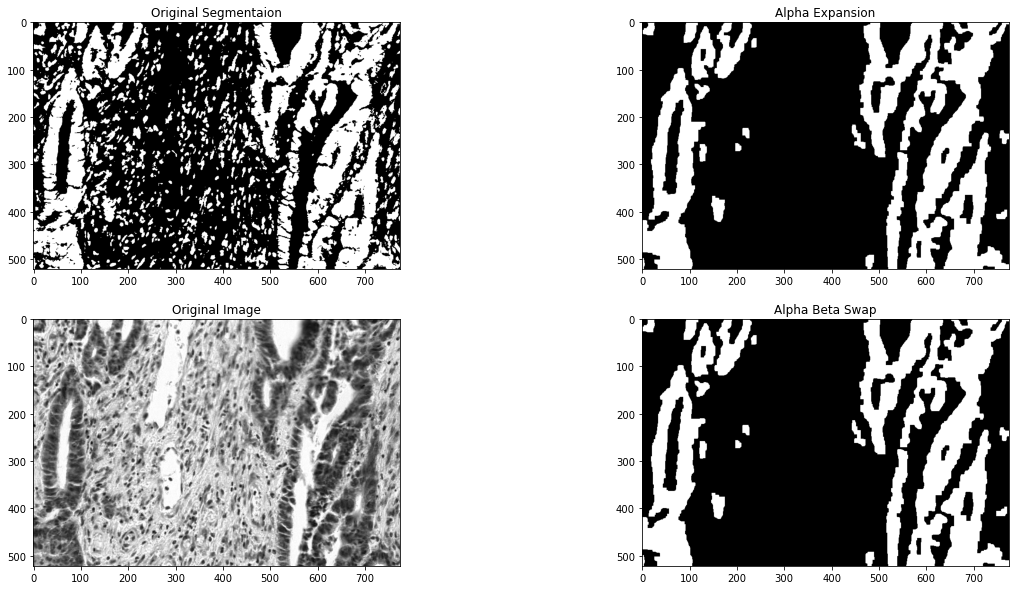

In [11]:
swap3,exp3 = alpha_seg(img3)

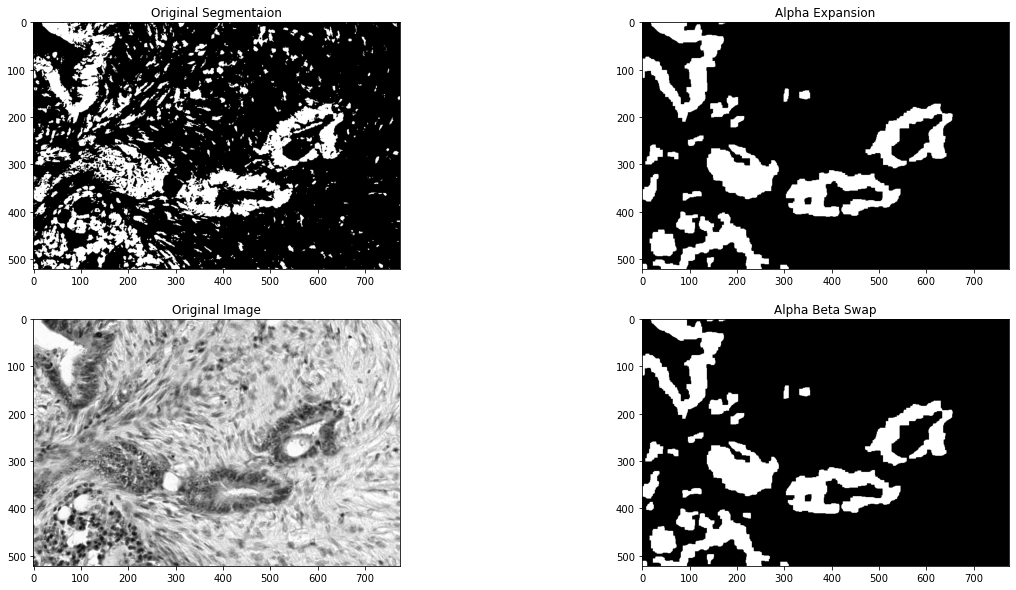

In [12]:
swap4,exp4 = alpha_seg(img4)

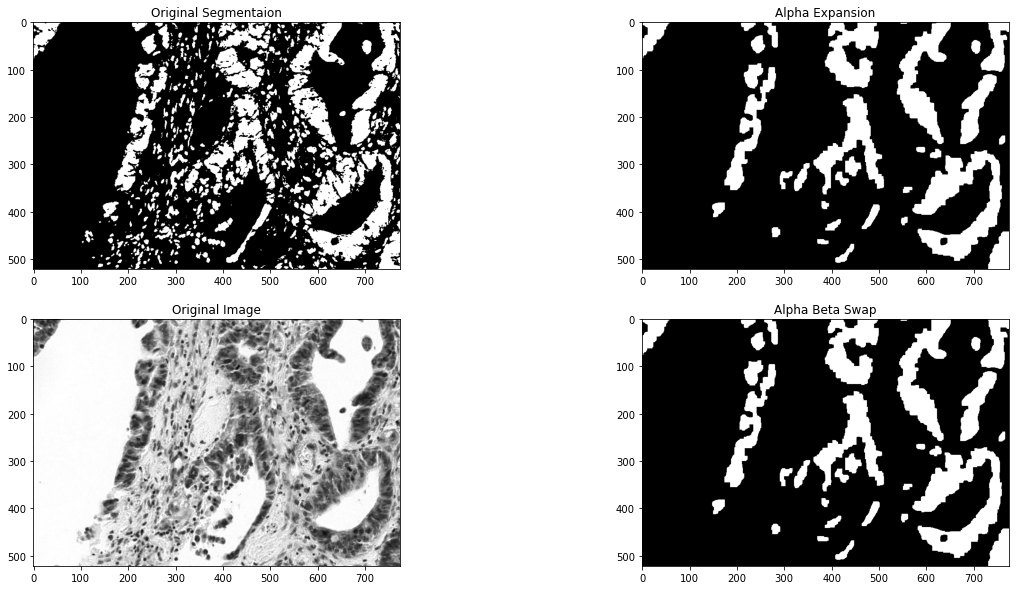

In [13]:
swap5,exp5 = alpha_seg(img5)

In [14]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,jaccard_score

scores_swap = [[accuracy_score(swap1.flatten(),img1_anno.flatten()),
accuracy_score(swap2.flatten(),img2_anno.flatten()),
accuracy_score(swap3.flatten(),img3_anno.flatten()),
accuracy_score(swap4.flatten(),img4_anno.flatten()),
accuracy_score(swap5.flatten(),img5_anno.flatten())],

[precision_score(swap1.flatten(),img1_anno.flatten()),
precision_score(swap2.flatten(),img2_anno.flatten()),
precision_score(swap3.flatten(),img3_anno.flatten()),
precision_score(swap4.flatten(),img4_anno.flatten()),
precision_score(swap5.flatten(),img5_anno.flatten())],

[recall_score(swap1.flatten(),img1_anno.flatten()),
recall_score(swap2.flatten(),img2_anno.flatten()),
recall_score(swap3.flatten(),img3_anno.flatten()),
recall_score(swap4.flatten(),img4_anno.flatten()),
recall_score(swap5.flatten(),img5_anno.flatten())],

[jaccard_score(swap1.flatten(),img1_anno.flatten()),
jaccard_score(swap2.flatten(),img2_anno.flatten()),
jaccard_score(swap3.flatten(),img3_anno.flatten()),
jaccard_score(swap4.flatten(),img4_anno.flatten()),
jaccard_score(swap5.flatten(),img5_anno.flatten())]]


In [15]:
scores_exp = [[accuracy_score(exp1.flatten(),img1_anno.flatten()),
accuracy_score(exp2.flatten(),img2_anno.flatten()),
accuracy_score(exp3.flatten(),img3_anno.flatten()),
accuracy_score(exp4.flatten(),img4_anno.flatten()),
accuracy_score(exp5.flatten(),img5_anno.flatten())],

[precision_score(exp1.flatten(),img1_anno.flatten()),
precision_score(exp2.flatten(),img2_anno.flatten()),
precision_score(exp3.flatten(),img3_anno.flatten()),
precision_score(exp4.flatten(),img4_anno.flatten()),
precision_score(exp5.flatten(),img5_anno.flatten())],

[recall_score(exp1.flatten(),img1_anno.flatten()),
recall_score(exp2.flatten(),img2_anno.flatten()),
recall_score(exp3.flatten(),img3_anno.flatten()),
recall_score(exp4.flatten(),img4_anno.flatten()),
recall_score(exp5.flatten(),img5_anno.flatten())],

[jaccard_score(exp1.flatten(),img1_anno.flatten()),
jaccard_score(exp2.flatten(),img2_anno.flatten()),
jaccard_score(exp3.flatten(),img3_anno.flatten()),
jaccard_score(exp4.flatten(),img4_anno.flatten()),
jaccard_score(exp5.flatten(),img5_anno.flatten())]]


In [16]:
pd.DataFrame(scores_swap,columns=['Image 1','Image 2','Image 3','Image 4','Image 5'],index=['Accuracy Score','Precision Score','Recall Score','Jaccard Score'])

Image 1   Image 2   Image 3   Image 4   Image 5
Accuracy Score   0.906906  0.788301  0.862049  0.876742  0.548128
Precision Score  0.360762  0.672508  0.713275  0.611755  0.305473
Recall Score     0.912172  0.952736  0.887582  0.669384  0.954429
Jaccard Score    0.348651  0.650796  0.654176  0.469803  0.301081

In [17]:
pd.DataFrame(scores_exp,columns=['Image 1','Image 2','Image 3','Image 4','Image 5'],index=['Accuracy Score','Precision Score','Recall Score','Jaccard Score'])

Image 1   Image 2   Image 3   Image 4   Image 5
Accuracy Score   0.906924  0.783972  0.860586  0.877889  0.546595
Precision Score  0.346266  0.663516  0.706755  0.603503  0.302183
Recall Score     0.945098  0.954336  0.889475  0.677348  0.956627
Jaccard Score    0.339438  0.643099  0.649698  0.468749  0.298099

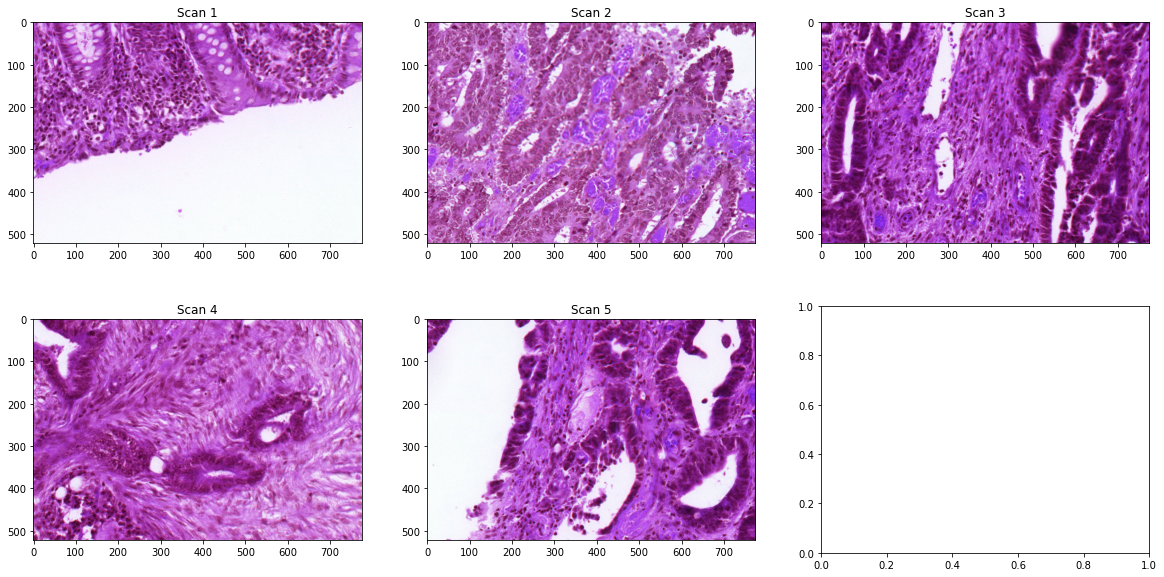

In [18]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title('Scan 1')
ax[0,1].imshow(img2,cmap='gray')
ax[0,1].set_title('Scan 2')
ax[0,2].imshow(img3,cmap='gray')
ax[0,2].set_title('Scan 3')
ax[1,0].imshow(img4,cmap='gray')
ax[1,0].set_title('Scan 4')
ax[1,1].imshow(img5,cmap='gray')
ax[1,1].set_title('Scan 5')
plt.show()